# Handwritten Digit Detection (SVM)

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pyscreenshot as ImageGrab
from tqdm import tqdm
import os
import glob
import csv



from random import shuffle


In [59]:
df=pd.read_csv('train.csv')
df=df.head(500)
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X=df.drop('label',axis=1)
Y=df['label']
Y

0      1
1      0
2      1
3      4
4      0
      ..
495    1
496    4
497    1
498    5
499    9
Name: label, Length: 500, dtype: int64

8


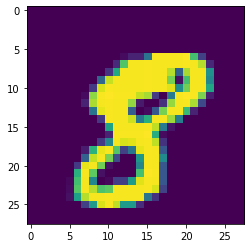

In [61]:
idx = 31
img = X.loc[10].values.reshape(28,28)
print(Y[10])
plt.imshow(img)

In [62]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

In [63]:
import joblib
from sklearn.svm import SVC
classifier=SVC(kernel="linear",degree=3,gamma='scale', random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier,'model/digit_recognizer')

['model/digit_recognizer']

In [64]:
#calculate accuracy
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))

Accuracy=  0.85


Prediction: 5


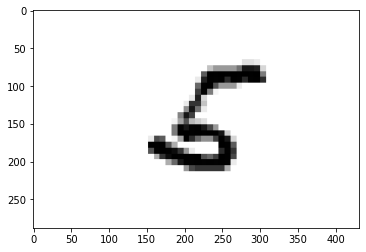

In [49]:
im = cv2.imread("img.png")
im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)

#Threshold the image
ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)

rows,cols=roi.shape

X = []

## Add pixel one by one into data array
for i in range(rows):
    for j in range(cols):
        k = roi[i,j]
        if k>100:
            k=1
        else:
            k=0
        X.append(k)

predictions  =classifier.predict([X])
print("Prediction:",predictions[0])
plt.imshow(im);

In [65]:
from sklearn.metrics import classification_report
prediction=classifier.predict(test_x)
print(classification_report(test_y,prediction))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       0.80      1.00      0.89         8
           2       0.86      0.92      0.89        13
           3       0.88      0.64      0.74        11
           4       0.62      1.00      0.77         5
           5       0.71      0.62      0.67         8
           6       0.67      1.00      0.80         6
           7       1.00      0.85      0.92        13
           8       1.00      0.82      0.90        11
           9       1.00      0.73      0.84        11

    accuracy                           0.85       100
   macro avg       0.84      0.86      0.83       100
weighted avg       0.87      0.85      0.85       100

